In [1]:
#import things we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from scipy.stats import zscore

# Load data, rotate as needed, join dataframes together for ease of processing later

In [2]:
set_metric='euclidean'

In [3]:
#import  data (all DA cells)
all_DA_cells = ['Cocaine','Control ketamine anesthesia','Control isoflurane anesthesia','Amphetamine',
                'Nicotine','Morphine','Fluoxetine','Ethanol','Stress',
                'GAD2-Cre isoflurane','GAD2-Cre Cocaine','GAD2-Cre isoflurane (lateral)','Toluene','Carbamazepine','Meth']
all_DA_cells_df = {} #empty dictionary
num_drugs=len(all_DA_cells) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=all_DA_cells[drug])
    #add id column with drug name and condition
    tempdf['condition']=all_DA_cells[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    all_DA_cells_df[drug]=tempdf #put into dictionary at index

In [4]:
# #import NAcMed data
NAcMeds = ['cTRIO NAcMed cocaine 1 inj','NAcMed controls','cTRIO NAcMed C 5 inj',
          'cTRIO NAcMed FC','cTRIO NAcMed ketamine anesthesi']
NAcMeds_df = {} #empty dictionary
num_drugs=len(NAcMeds) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcMeds[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcMeds[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcMeds_df[drug]=tempdf #put into dictionary at index

In [5]:
NAcMed_data=pd.concat(
    NAcMeds_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
NAcMed_data.rename(columns={"%Cortex": "%Anterior Cortex"},inplace=True)

In [6]:
# #import NAcLat data
NAcLats = ['cTRIO NAcLat cocaine','NAcLat iso saline controls','cTRIO NAcLat C 5 inj',
          'cTRIO NAcLat FC','cTRIO NAcLat ketamine anesthesi']
NAcLats_df = {} #empty dictionary
num_drugs=len(NAcLats) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcLats[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcLats[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcLats_df[drug]=tempdf #put into dictionary at index

In [7]:
#combine NAcLat data
NAcLat_data=pd.concat(
    NAcLats_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
NAcLat_data.rename(columns={"%Cortex": "%Anterior Cortex"},inplace=True)

In [8]:
# #import DLS data
DLSs = ['DLS_sal','DLS_coc1x','DLS_FC']
DLSs_df = {} #empty dictionary
num_drugs=len(DLSs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=DLSs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=DLSs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    DLSs_df[drug]=tempdf #put into dictionary at index

In [9]:
#combine DLS data
DLS_data=pd.concat(
    DLSs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [10]:
# #import DLS data
DMSs = ['cTRIO DMS saline','cTRIO DMS cocaine']
DMSs_df = {} #empty dictionary
num_drugs=len(DMSs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/cTRIO DMS data.xlsx',
                           sheet_name=DMSs[drug])
    #add id column with drug name and condition
    tempdf['condition']=DMSs[drug]
    tempdf.dropna(inplace=True)
    tempdf.reset_index(inplace=True, drop=True)
    DMSs_df[drug]=tempdf #put into dictionary at index
#combine DLS data
DMS_data=pd.concat(
    DMSs_df,
    axis=0,
    join="outer",
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [11]:
# #import amygdala data
Amygs = ['cTRIO Amygdala cocaine 1 dose','cTRIO Amygdala isoflurane anest','cTRIO Amygdala AFC']
Amygs2= ['cTRIO Amygdala ketamine anesthe']
Amygs_df = {} #empty dictionary
num_drugs=len(Amygs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=Amygs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=Amygs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=Amygs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=Amygs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[3]=tempdf #put into dictionary at index

In [12]:
#combine Amyg data
Amyg_data=pd.concat(
    Amygs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [13]:
Amyg_data.dropna(inplace=True,axis=1)

In [14]:
#import mPFC data
mPFCs = ['cTRIO mPFC isoflurane anesthesi','cTRIO mPFC cocaine 1 dose','cTRIO mPFC AFC']
mPFCs2= ['cTRIO mPFC ketamine anesthesia']
mPFCs_df = {} #empty dictionary
num_drugs=len(mPFCs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=mPFCs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=mPFCs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=mPFCs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=mPFCs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[3]=tempdf #put into dictionary at index

In [15]:
# combine mPFC data
mPFC_data=pd.concat(
    mPFCs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [16]:
mPFC_data.dropna(inplace=True,axis=1)

In [17]:
all_data=pd.concat(
    all_DA_cells_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [18]:
#import  data DAT-cre
DATcre66T = pd.read_excel(r'data/8dat-crebrains.xlsx')
#and import dat cre and gad2 also from 76 brain set
DATcre66T_gad2 = pd.read_excel(r'data/12datcre-and-gad2.xlsx')
#import coffee
caffeine_dat = pd.read_excel(r'data/Caffeine data.xlsx')
#import vglut2
VGlut2_cre = pd.read_excel(r'data/vGluT2-Cre.xlsx')

# Define some functions, variables, and other things we will use

In [19]:
uniq_colors=['mediumorchid','gray','royalblue','darkred','red','hotpink',
             'khaki','palegreen','seagreen','orange','lavender',
             'steelblue','navy','dodgerblue','thistle','violet',
             'deeppink','pink','slateblue','peru','darkorange',
             'magenta','cyan','lightcoral','lawngreen',
             'burlywood'] # to use later

In [20]:
def signif(x, p): #get p significant digits of all of a numpy array (why does base numpy not have this...)
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

In [21]:
def plot_components(components_df,condition_nums): #plot feature importance of the PCA components 1-5
    #code adapted from 
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    fig, ax = plt.subplots(figsize=(8, 30))
    comptemp0=components_df.transpose()
    comptemp1=comptemp0.to_numpy()
    comptemp=signif(comptemp1,3)
    im = ax.imshow(comptemp)
    pca5=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']
    regions=components_df.columns
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(pca5)))
    ax.set_yticks(np.arange(len(regions)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(pca5)
    ax.set_yticklabels(condition_nums)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fig.colorbar(im)

    # Loop over data dimensions and create text annotations.
    for i in range(len(regions)):
        for j in range(len(pca5)):
            text = ax.text(j, i, comptemp[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Components and Feature Importance")
    fig.tight_layout()
    plt.show()

In [22]:
def make_pca_plots(pc1,pc2,pc3,labels): #makes plots of pc1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'pc1': pc1.values,'pc2': pc2.values,'pc3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 2')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [23]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [24]:
featuresDMS, labelsDMS, condition_numsDMS, regionsDMS =get_feats_and_labels(DMS_data)

In [25]:
gad2only2=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)')|(all_data["condition"] == 'GAD2-Cre isoflurane')]
features4, labels4, condition_nums4, regions4 = get_feats_and_labels(gad2only2) 

In [26]:
#modularized pieter's code
def umap_n_times(X_scaled,labels,N = 20,n_neighbors=15,metric='euclidean'):
    umap_distances = np.zeros((len(labels),len(labels),N,))
    for n in range(0,N):
        embedding=umap.UMAP(n_neighbors=n_neighbors,metric=metric).fit_transform(X_scaled)
        for r1 in range(0,len(labels)):
            for r2 in range(0,len(labels)):
                d = np.sum((embedding[r1]-embedding[r2])**2)**(0.5)
                umap_distances[r1,r2,n]=d
        max_distance = np.max(umap_distances[:,:,n])
        umap_distances[:,:,n] = umap_distances[:,:,n]/max_distance
    umap_distances_means = np.mean(umap_distances,axis=2)
    return umap_distances_means

In [27]:
#modularized pieter's code
def umap_dist_heatmap(t1,indexed='no'):
    if indexed=='yes':
        labs=labels.values
        uniq=list(range(len(labels)))
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    else:
        labs=labels.values
        uniq=[x[1] for x in labels.index.values]
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    fig,ax =plt.subplots(figsize=(10,4))
    plt.pcolor(t1, cmap="RdYlBu_r")

    plt.yticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.xticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.colorbar()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.show()

In [28]:
#modularized pieter's code
def pca_distance(pc1,pc2,pc3,labels):
    pca_distances = np.zeros((len(labels),len(labels)))
    for r1 in range(0,len(labels)):
        for r2 in range(0,len(labels)):
            d = ((pc1[r1]-pc1[r2])**2 +(pc2[r1]-pc2[r2])**2+(pc3[r1]-pc3[r2])**2)**(0.5)
            pca_distances[r1,r2]=d #euclidean distance
    max_distance = np.max(pca_distances[:,:])
    pca_distances[:,:] = pca_distances[:,:]/max_distance #normalized
    return pca_distances

In [29]:
def get_feats_and_labels(dataframe):
    regions=dataframe['Experimental condition']
    condition_nums=dataframe['condition_nums']
    features0=dataframe.iloc[: , 1:23]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums
features2, labels2, regions2, condition_nums2 = get_feats_and_labels(caffeine_dat)

In [30]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [31]:
features, labels, regions, condition_nums = get_feats_and_labels(all_data)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [32]:
gad2only2=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)') | (all_data["condition"] == 'GAD2-Cre isoflurane')]
features2, labels2, regions2,condition_nums2 = get_feats_and_labels(gad2only2)

In [33]:
gad2only=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)') | 
                  (all_data["condition"] == 'GAD2-Cre Cocaine')| (all_data["condition"] == 'GAD2-Cre isoflurane')]
features, labels, regions, condition_nums = get_feats_and_labels(gad2only)
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                 9                                                      10  \
                  0          1          2          3          4          0   
%Cortex    0.762227   2.083800   2.378436   2.394715   1.531429   1.777003   
%NAcMed    4.382808   3.562626   2.695560   3.550784   9.028571   1.567944   
%NAcLat    3.493542   4.570916   1.902748   3.055326   9.325714   1.358885   
%NAcCore  12.005082   4.705355   7.293869   5.202312  13.714286   3.867596   
%DStr      7.304679   2.554336   1.427061   1.940545  10.240000   0.836237   
%VP        6.669490   1.008290   1.585624  11.560694   9.600000   9.303136   
%PO        6.034300   1.142729   3.964059   3.179191   3.268571   7.108014   
%Septum    0.254076   0.000000   0.317125   0.206441   0.708571   0.209059   
%BNST      3.811137   4.302039   7.928118   5.078448   2.582857   9.825784   
%EAM       1.905568   3.629845   2.536998   4.128819   3.177143   5.435540   
%EP        0.698708   0.739413   1.109937   0.825764   0.228571 

In [34]:
NAcMed_data2=NAcMed_data[(NAcMed_data["condition"] == 'NAcMed controls') |
                (NAcMed_data["condition"] == 'cTRIO NAcMed cocaine 1 inj')| 
                (NAcMed_data["condition"] == 'cTRIO NAcMed C 5 inj')| 
                (NAcMed_data["condition"] == 'cTRIO NAcMed ketamine anesthesi')]
features, labels, regions, condition_nums= get_feats_and_labels(NAcMed_data2)

NAcMed_data2=NAcMed_data[(NAcMed_data["condition"] == 'NAcMed controls') |
                (NAcMed_data["condition"] == 'cTRIO NAcMed cocaine 1 inj')]
features_nacmed, labels_nacmed, condition_nums_nacmed, regions_nacmed= get_feats_and_labels(NAcMed_data2)

In [35]:
NAcLat_data2=NAcLat_data[(NAcLat_data["condition"] == 'cTRIO NAcLat ketamine anesthesi') |
                (NAcLat_data["condition"] == 'cTRIO NAcLat C 5 inj')| 
                (NAcLat_data["condition"] == 'cTRIO NAcLat cocaine')| 
                (NAcLat_data["condition"] == 'NAcLat iso saline controls')]
features, labels, regions, condition_nums= get_feats_and_labels(NAcLat_data2)

In [36]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    condition_nums=dataframe['condition_num'].values
    labels=features.index
    return features, labels, regions, condition_nums

In [37]:
DLS_data.reset_index(inplace=True)
features, labels, regions, condition_nums= get_feats_and_labels(DLS_data)

In [38]:
DLS_data2=DLS_data[(DLS_data["condition"] == 'DLS_sal') |
                (DLS_data["condition"] == 'DLS_coc1x')]
features, labels, regions, condition_nums= get_feats_and_labels(DLS_data2)
features_DLS, labels_DLS, condition_nums_DLS,regions_DLS= get_feats_and_labels(DLS_data2)

In [39]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_num'].values
    return features, labels, regions, condition_nums

In [40]:
Amyg_data.reset_index(inplace=True)
features, labels, regions, condition_nums = get_feats_and_labels(Amyg_data)

In [41]:
Amyg_data2=Amyg_data[(Amyg_data["condition"] == 'cTRIO Amygdala cocaine 1 dose') |
                (Amyg_data["condition"] == 'cTRIO Amygdala isoflurane anest')| 
                (Amyg_data["condition"] == 'cTRIO Amygdala ketamine anesthe')]
features, labels, regions, condition_nums = get_feats_and_labels(Amyg_data2)

In [42]:
Amyg_data2=Amyg_data[(Amyg_data["condition"] == 'cTRIO Amygdala cocaine 1 dose') |
                (Amyg_data["condition"] == 'cTRIO Amygdala isoflurane anest')]
features_amyg, labels_amyg, condition_nums_amyg, regions_amyg = get_feats_and_labels(Amyg_data2)

In [43]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_num'].values
    return features, labels, regions, condition_nums

In [44]:
mPFC_data.reset_index(inplace=True)
features, labels, regions, condition_nums= get_feats_and_labels(mPFC_data)

In [45]:
#make proper dataframe here!
mPFC_data2=mPFC_data[(mPFC_data["condition"] == 'cTRIO mPFC ketamine anesthesia') |
                (mPFC_data["condition"] == 'cTRIO mPFC cocaine 1 dose')| 
                (mPFC_data["condition"] == 'cTRIO mPFC isoflurane anesthesi')]
features, labels, regions, condition_nums = get_feats_and_labels(mPFC_data2)

In [46]:
#make proper dataframe here!
mPFC_data2=mPFC_data[(mPFC_data["condition"] == 'cTRIO mPFC cocaine 1 dose')| 
                (mPFC_data["condition"] == 'cTRIO mPFC isoflurane anesthesi')]
featuresmPFC, labelsmPFC, condition_numsmPFC, regionsmPFC = get_feats_and_labels(mPFC_data2)

In [47]:
def get_feats_and_labels(dataframe):
    regions=dataframe['Experimental condition'].values
    features0=dataframe.iloc[: , 1:23]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_nums'].values
    return features, labels, regions, condition_nums
features, labels, regions, condition_nums=get_feats_and_labels(DATcre66T)
features_datcre66t, labels_datcre66t, regions_datcre66t, condition_nums_datcre66t=get_feats_and_labels(DATcre66T)

In [48]:
features, labels, regions, condition_nums=get_feats_and_labels(DATcre66T_gad2)
regions=list(regions)+list(regions2)
condition_nums=list(condition_nums)+list(condition_nums2)
#scale X 
X=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
#get rid of NAs before scaling
X=np.hstack((X, X2))
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                0          1          2          3          4          5   \
Cortex    4.539353   3.458260   1.838390   2.448574   4.309921   2.850023   
NAcMed    5.564369   5.113636   7.768099   6.700491   4.328340   9.484504   
NAcLat    4.795607   4.572771   6.650646   3.722495   4.641454   0.934434   
NAcCore   5.491153   4.736670  11.282667   4.963327   4.365177   3.877901   
DStr      6.314826   4.458042  27.053169  11.986434   5.654470   2.476250   
VP       11.000610  11.161495   5.893662  11.928528   8.380403  10.185329   
PO        5.289811   6.244537   3.045960   5.062593   4.254666   5.139386   
Septum    0.787065   3.114073   0.288375   1.381459   0.276277   1.074599   
BNST      1.629042   1.966783   1.676179   1.836431   0.847250   2.943467   
EAM       5.271507   4.753059   2.288976   4.309822   6.004420   4.859056   
EP        0.622331   0.147509   0.378492   0.115811   0.828831   0.140165   
Gpe       5.930445   3.245192   6.127966   2.614019   5.801817   1.354929   

In [49]:
features2, labels2, condition_nums2, regions2 = get_feats_and_labels(DATcre66T_gad2)
features3, labels3, condition_nums3, regions3 = get_feats_and_labels(VGlut2_cre)
labels=list(labels2)
condition_nums=list(condition_nums2)+list(condition_nums4)+list(condition_nums3)
regions=list(regions2)+list(regions4)+list(regions3)
#scale X 

X2=features2.to_numpy().astype(float)
X3=features3.to_numpy().astype(float)
X4=features4.to_numpy().astype(float)
#features4, labels4, condition_nums4, regions4
X=np.hstack((X2, X4))
X=np.hstack((X, X3))
#get rid of NAs before scaling

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

In [50]:
features=featuresDMS
labels=labelsDMS
condition_nums=condition_numsDMS
regions=regionsDMS

# Controls vs cocaine - all conditions - gather the data

for coc vs saline, it should be all of the conditions. for saline, it should be DAT-Cre, 66T, plus all the DAT-Cre cTRIO saline conditions (there should be about 20 of them). then a roughly equal number of cocaine conditions. so it should be approx a 20 x 20 comparison

Cocaine includes:

-cTRIO DMS cocaine

-cTRIO NAcLat cocaine

-mPFC cocaine

-Amygdala cocaine

-DLS cocaine

-Nacmed cocaine

Controls includes:

-cTRIO DMS saline

-NAcLat iso saline controls

-DAT-Cre

-DAT-Cre 66T

-mPFC saline

-Amygdala saline

-DLS saline
 
-Nacmed saline

In [51]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [52]:
# NAcLat_data 'cTRIO NAcLat cocaine','NAcLat iso saline controls'
NAcLat_data2=NAcLat_data[(NAcLat_data["condition"] == 'cTRIO NAcLat cocaine')| 
                (NAcLat_data["condition"] == 'NAcLat iso saline controls')]
features, labels, condition_nums, regions= get_feats_and_labels(NAcLat_data2)

In [53]:
labels=sorted(labels)
labels

['%Anterior Cortex',
 '%BNST',
 '%CeA',
 '%DCN',
 '%DR',
 '%DStr',
 '%EAM',
 '%EP',
 '%GP',
 '%LDT',
 '%LH',
 '%LHb',
 '%MHb',
 '%NAcCore',
 '%NAcLat',
 '%NAcMed',
 '%PBN',
 '%PO',
 '%PVN',
 '%Septum',
 '%VP',
 '%ZI']

In [54]:
featuresmPFC.sort_index(axis=0)

,0,1,2,3,4,5,6,7
Anterior Cortex,0.747198,0.675676,1.347666,1.688103,3.789474,3.680982,3.405221,2.694611
BNST,4.483188,4.054054,4.18739,3.858521,4.421053,5.06135,4.426788,5.389222
CeA,2.615193,2.252252,1.203273,3.617363,3.157895,2.300613,2.724177,2.694611
DCN,0.373599,0.600601,0.032087,0.562701,0.0,0.306748,0.681044,0.0
DR,46.32628,34.68469,17.80844,33.03859,22.73684,28.83436,25.87968,33.23353
DStr,0.373599,2.927928,13.28413,0.241158,5.68421,0.460123,0.0,0.0
EAM,4.109589,2.477478,0.433178,5.787781,4.421053,3.834356,3.745744,2.694611
EP,0.0,0.0,0.625702,0.0,0.0,0.153374,0.340522,0.0
GPe,3.73599,1.801802,3.176641,0.482315,2.526316,1.840491,0.340522,0.0
LDT,1.24533,2.102102,2.791593,0.803859,1.263158,1.840491,0.908059,1.197605


In [55]:
#features_nacmed, labels_nacmed, condition_nums_nacmed, regions_nacmed 
condition_nums=list(condition_nums)+list(condition_numsDMS)+list(condition_nums_datcre66t)+list(condition_numsmPFC)+list(condition_nums_amyg)+list(condition_nums_DLS)+list(condition_nums_nacmed)
regions=list(regions)+list(regionsDMS)+list(regions_datcre66t)+list(regionsmPFC)+list(regions_amyg)+list(regions_DLS)+list(regions_nacmed)
X1=features.sort_index(axis=0).to_numpy().astype(float)
X2=featuresDMS.sort_index(axis=0).to_numpy().astype(float)
X3=features_datcre66t.sort_index(axis=0).to_numpy().astype(float)
X4=featuresmPFC.sort_index(axis=0).to_numpy().astype(float)
X_amyg=features_amyg.sort_index(axis=0).to_numpy().astype(float)
X_DLS=features_DLS.sort_index(axis=0).to_numpy().astype(float)
X_nacmed=features_nacmed.sort_index(axis=0).to_numpy().astype(float)
X5=np.hstack((X1, X2))
X6=np.hstack((X5, X3))
X7=np.hstack((X6, X4))
X8=np.hstack((X7, X_amyg))
X9=np.hstack((X8, X_DLS))
X=np.hstack((X9, X_nacmed))

In [56]:
regions

['cTRIO NAcLat cocaine-1',
 'cTRIO NAcLat cocaine-2',
 'cTRIO NAcLat cocaine-3',
 'cTRIO NAcLat cocaine-4',
 'cTRIO NAcLat cocaine-5',
 'NAcLat iso saline controls-1',
 'NAcLat iso saline controls-2',
 'NAcLat iso saline controls-3',
 'NAcLat iso saline controls-4',
 'cTRIO DMS saline 1',
 'cTRIO DMS saline 2',
 'cTRIO DMS saline 3',
 'cTRIO DMS saline 4',
 'cTRIO DMS coc 1',
 'cTRIO DMS coc 2',
 'cTRIO DMS coc 4',
 'cTRIO DMS coc 5',
 'DAT-Cre',
 'DAT-Cre',
 'DAT-Cre',
 'DAT-Cre',
 'DAT-Cre 66T',
 'DAT-Cre 66T',
 'DAT-Cre 66T',
 'DAT-Cre 66T',
 'cTRIO mPFC isoflurane anesthesi-1',
 'cTRIO mPFC isoflurane anesthesi-2',
 'cTRIO mPFC isoflurane anesthesi-3',
 'cTRIO mPFC isoflurane anesthesi-4',
 'cTRIO mPFC cocaine 1 dose-1',
 'cTRIO mPFC cocaine 1 dose-2',
 'cTRIO mPFC cocaine 1 dose-3',
 'cTRIO mPFC cocaine 1 dose-4',
 'cTRIO Amygdala cocaine 1 dose-1',
 'cTRIO Amygdala cocaine 1 dose-2',
 'cTRIO Amygdala cocaine 1 dose-3',
 'cTRIO Amygdala cocaine 1 dose-4',
 'cTRIO Amygdala cocaine 

In [57]:
ids_forX=[]
cocaine_regs=[]
cocaine_connums=[]
for idx,reg in enumerate(regions):
    if (('coc' in reg) & ('cTRIO' not in reg)):
        ids_forX.append(idx)
        cocaine_regs.append(reg)
for reg in condition_nums:
    if (('coc' in reg) & ('cTRIO' not in reg)):
        cocaine_connums.append(reg)
ids_forsalX=[]
sal_regs=[]
sal_connums=[]
for idx,reg in enumerate(regions):
    if (('coc' not in reg) & ('cTRIO' not in reg)):
        ids_forsalX.append(idx)
        sal_regs.append(reg)
for reg in condition_nums:
    if (('coc' not in reg) & ('cTRIO' not in reg)):
        sal_connums.append(reg)

In [58]:
ids_forX=[]
cocaine_regs=[]
cocaine_connums=[]
for idx,reg in enumerate(regions):
    if 'coc' in reg:
        ids_forX.append(idx)
        cocaine_regs.append(reg)
for reg in condition_nums:
    if 'coc' in reg:
        cocaine_connums.append(reg)
ids_forsalX=[]
sal_regs=[]
sal_connums=[]
for idx,reg in enumerate(regions):
    if 'coc' not in reg:
        ids_forsalX.append(idx)
        sal_regs.append(reg)
for reg in condition_nums:
    if 'coc' not in reg:
        sal_connums.append(reg)

In [59]:
salineX=X[:,ids_forsalX]
salineX.shape

(22, 34)

In [60]:
X.shape

(22, 62)

In [61]:
cocX=X[:,ids_forX]
cocX.shape

(22, 28)

In [62]:
cocX #labels
cocdf = pd.DataFrame(data=cocX, index=labels)
cocdf.to_csv('cocaine_rabies.csv')

In [63]:
salineX
saldf = pd.DataFrame(data=salineX, index=labels)
saldf.to_csv('saline_rabies.csv')

# Cocaine - all conditions

In [64]:
#scale X 
condition_nums=cocaine_connums
regions=cocaine_regs
X=cocX

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[9.04039246 3.99656201 2.98138659 2.35891137 1.86307763]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.188097,-0.957200,2.359077,-1.650416,0.422868
1,-2.857304,1.241919,2.501087,0.196597,-0.767196
2,1.637546,0.948482,1.625883,0.453179,-1.681049
3,1.987248,2.310609,-1.913636,0.366192,1.811412
4,-4.388530,-1.820673,0.536133,1.265105,1.000905
5,5.143009,-0.686802,0.338346,-0.264746,-0.702172
6,-2.071218,0.432103,-1.665843,4.469968,-2.404609
7,2.097805,0.735187,2.417952,-0.078910,0.099025
8,3.917154,2.684077,-0.780273,0.610015,0.274313
9,-1.304514,-3.628846,-0.433080,0.272336,2.219803


### PCA Plots

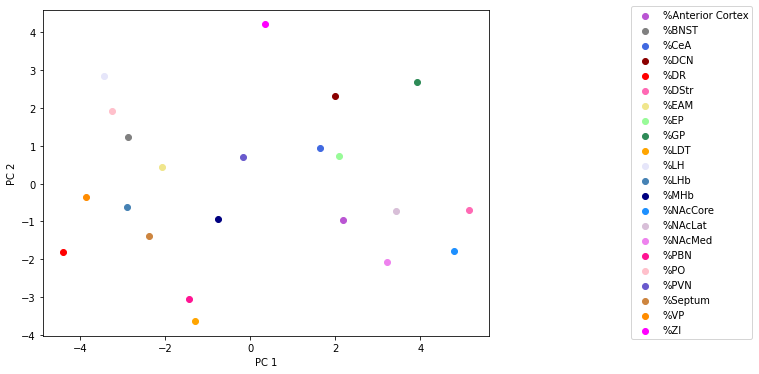

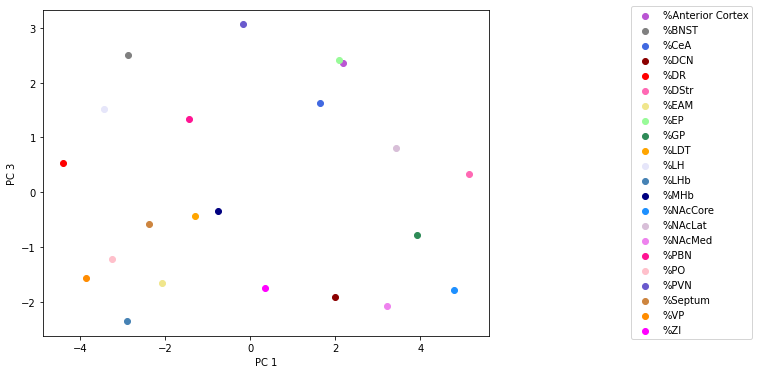

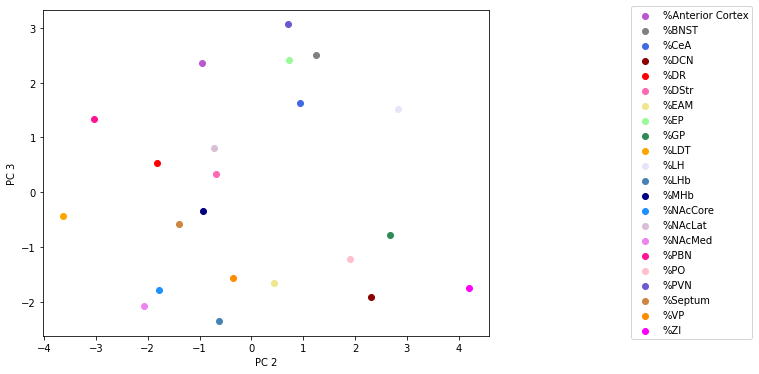

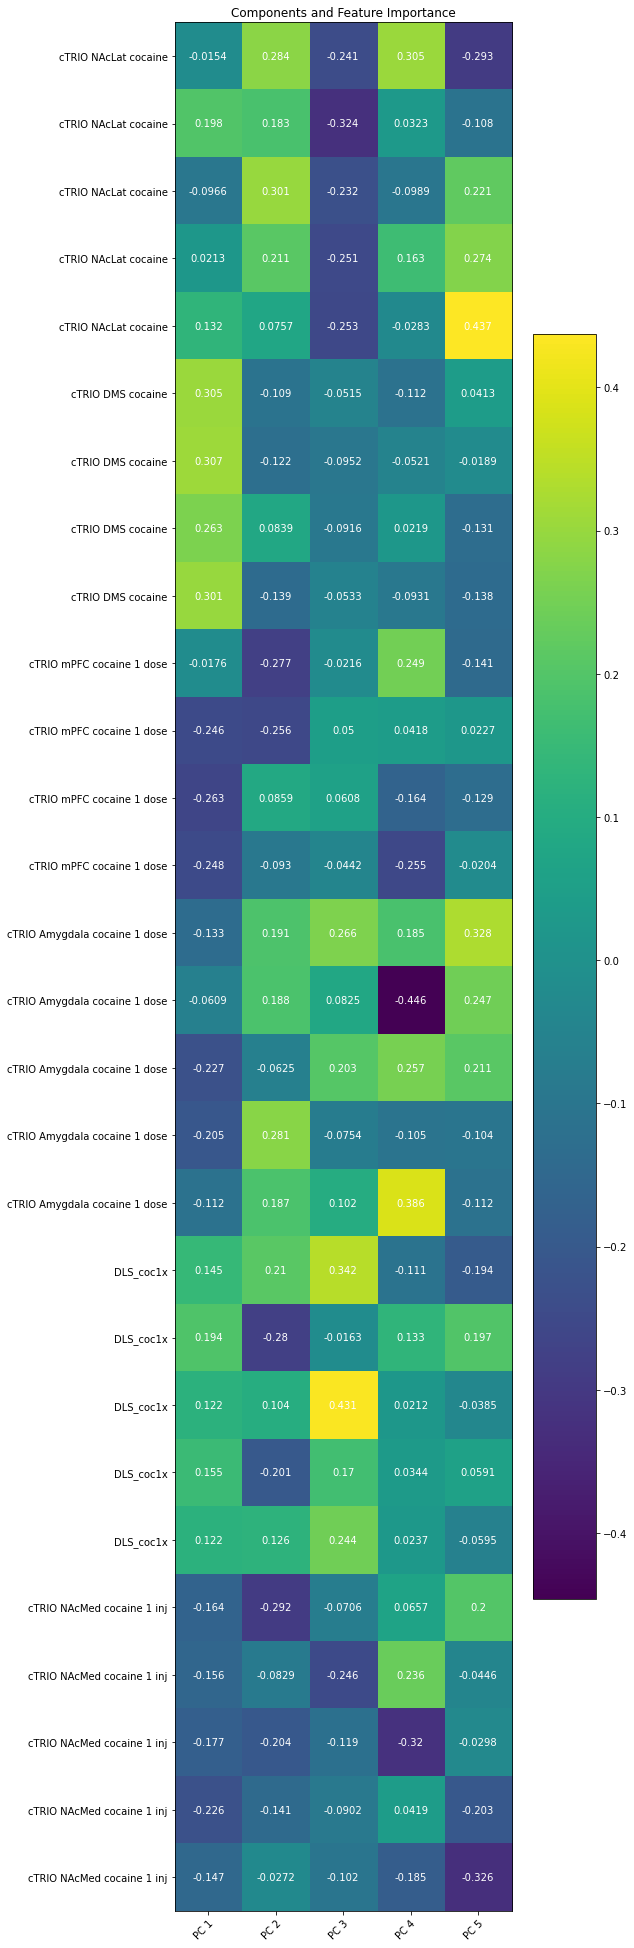

In [65]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

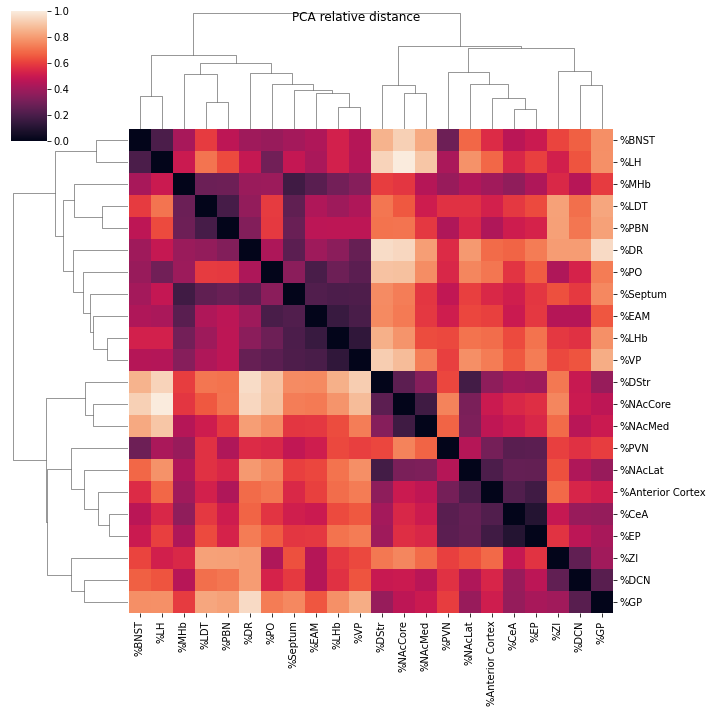

In [66]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

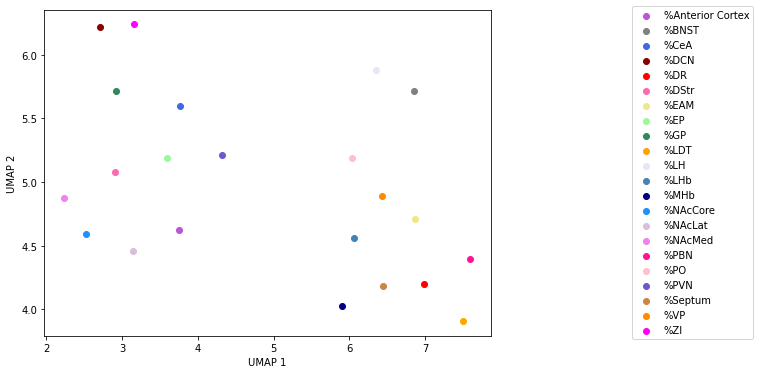

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


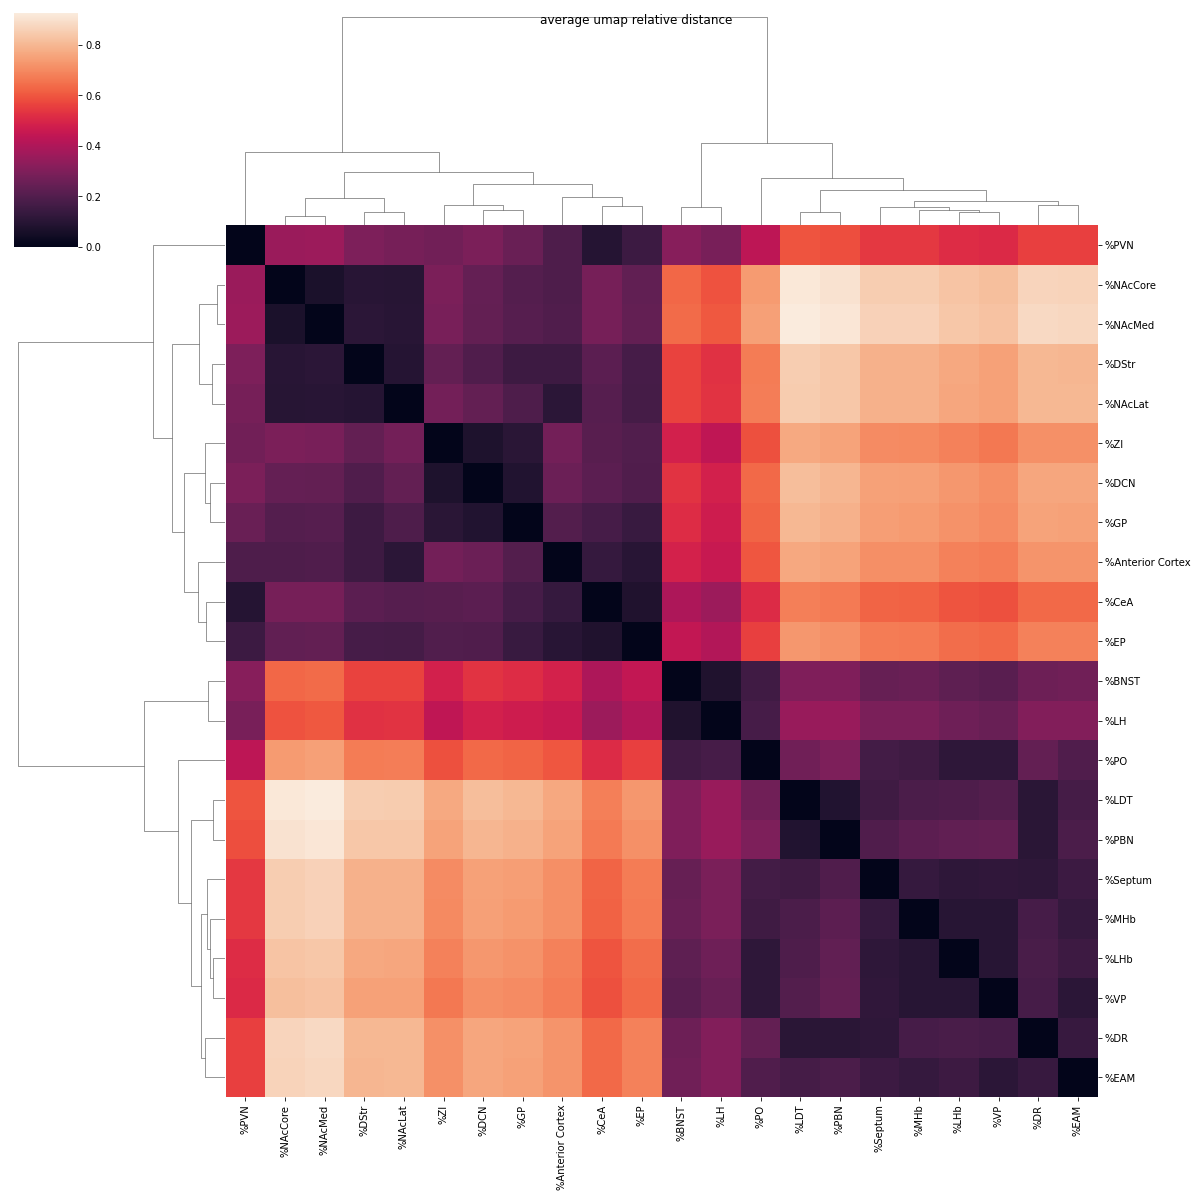

In [67]:
neighbors=int(len(labels)/3)
metrics=set_metric
reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1)  
embedding = reducer.fit_transform(X_scaled)
embedding.shape

align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for i,r in enumerate(np.unique(align_embed.index.values)):
    drug1=align_embed[align_embed.index == r]
    ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.savefig('figures/figumap_note6in67.svg')
plt.show()

#distance heatmap
to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
cm.fig.suptitle("average umap relative distance")
cm.fig.set_size_inches(18, 18)
plt.savefig('figures/figcorr_note6in67.svg')

# Controls - all conditions

In [68]:
#scale X 
condition_nums=sal_connums
regions=sal_regs
X=salineX

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[11.24826205  5.71461269  3.07062597  2.90481945  2.10321984]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.260476,-0.659491,0.324234,3.336593,1.758158
1,-0.550695,-0.559158,5.858751,0.150831,-0.418394
2,4.139962,-2.698123,-0.251659,0.870666,0.111604
3,1.792056,-2.652808,-0.822541,1.243182,0.758155
4,-3.106625,-3.392142,1.666304,-2.780834,-1.248009
5,5.698713,0.784401,-0.272701,-1.786150,0.001351
6,-1.685303,-1.356607,-2.148667,3.032815,-2.783216
7,4.705419,-1.175170,-1.734366,-2.584225,0.061680
8,4.719106,0.715629,0.220449,-1.132778,-0.885830
9,-2.664097,-0.526470,-0.192356,-1.325720,3.670011


### PCA Plots

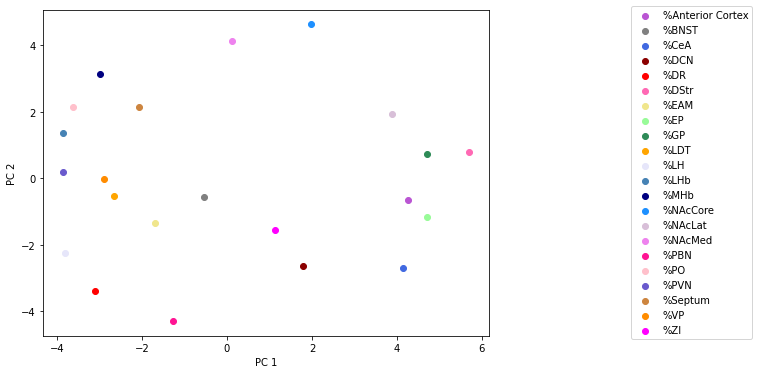

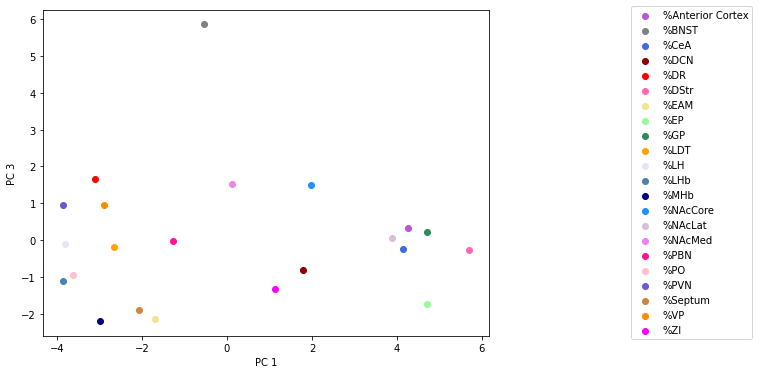

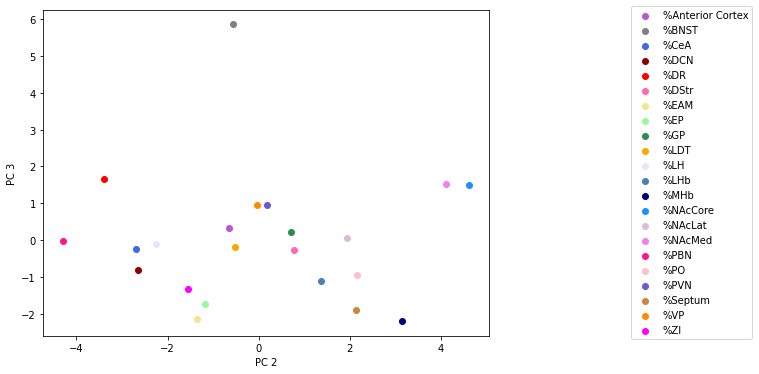

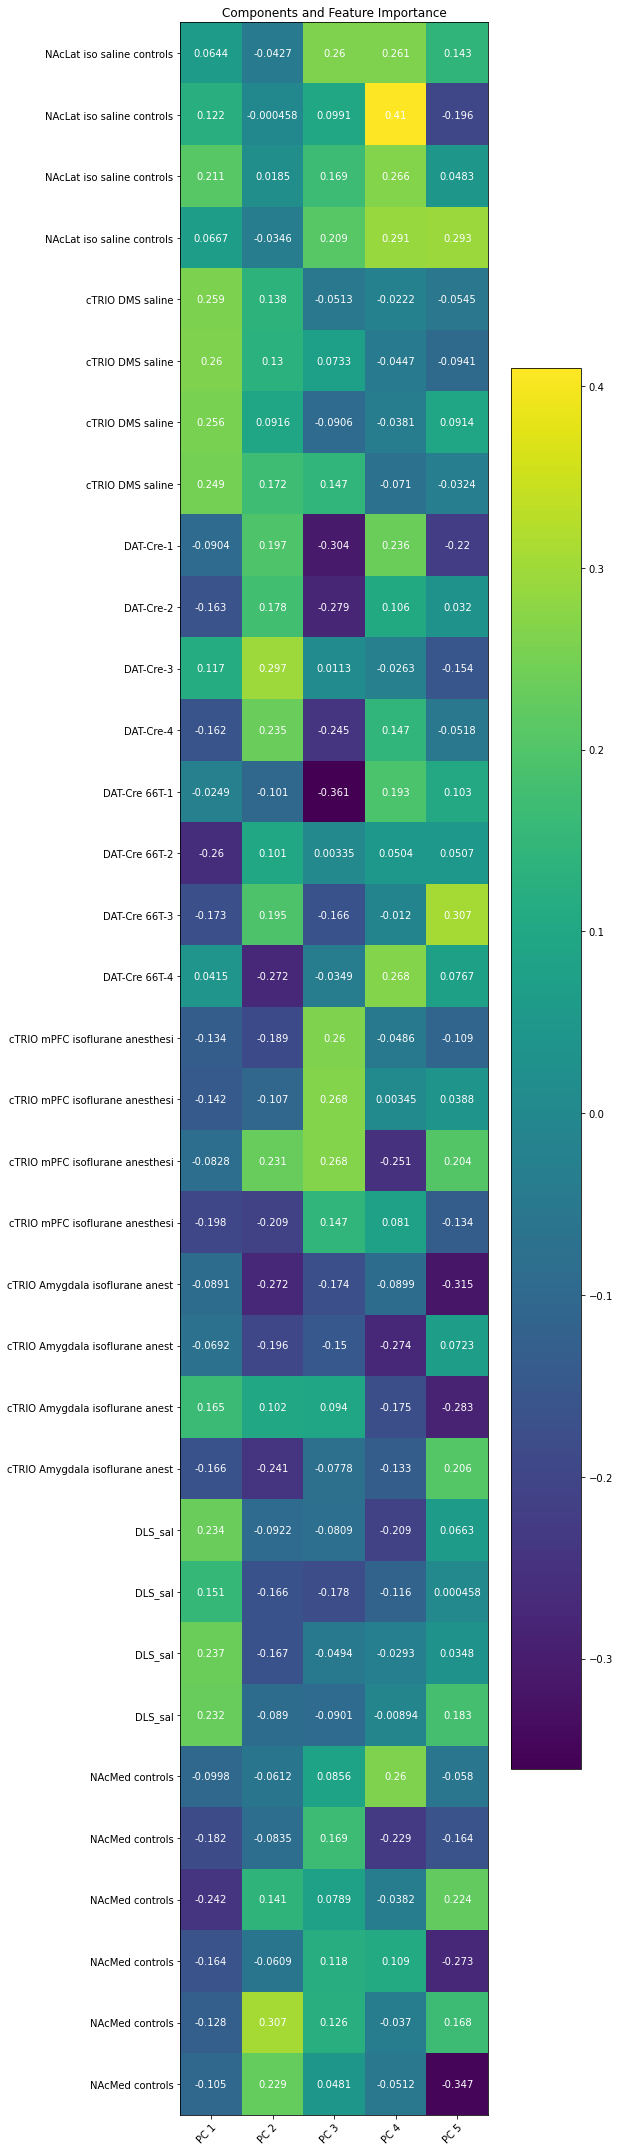

In [69]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

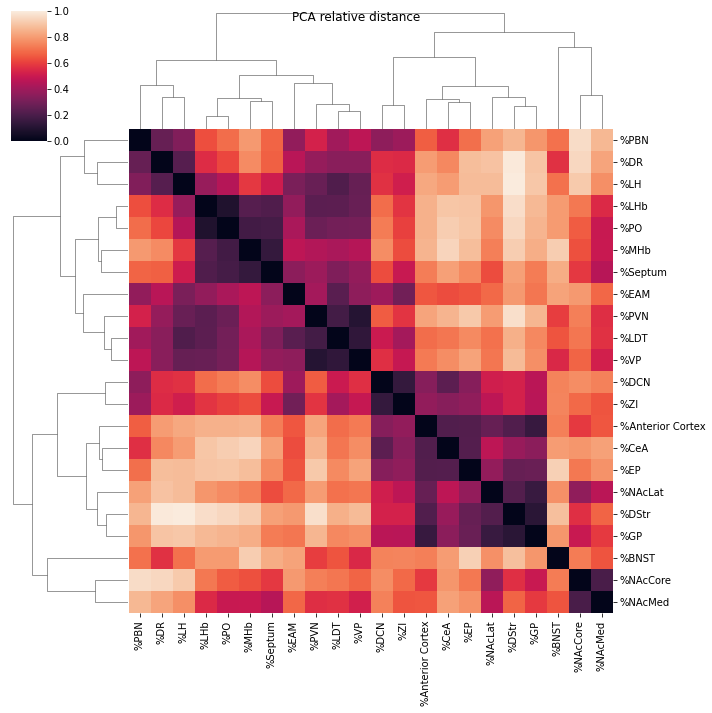

In [70]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

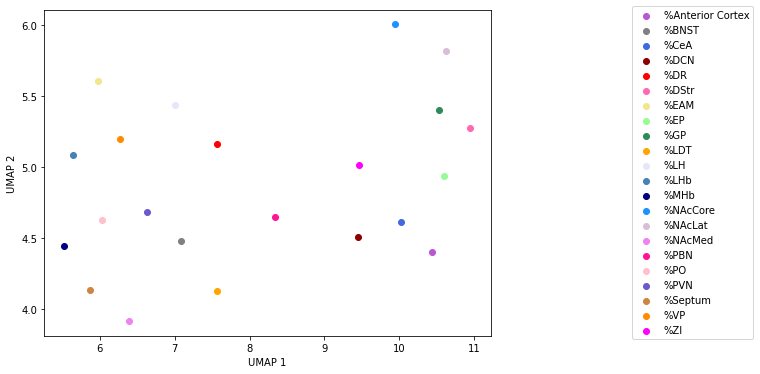

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


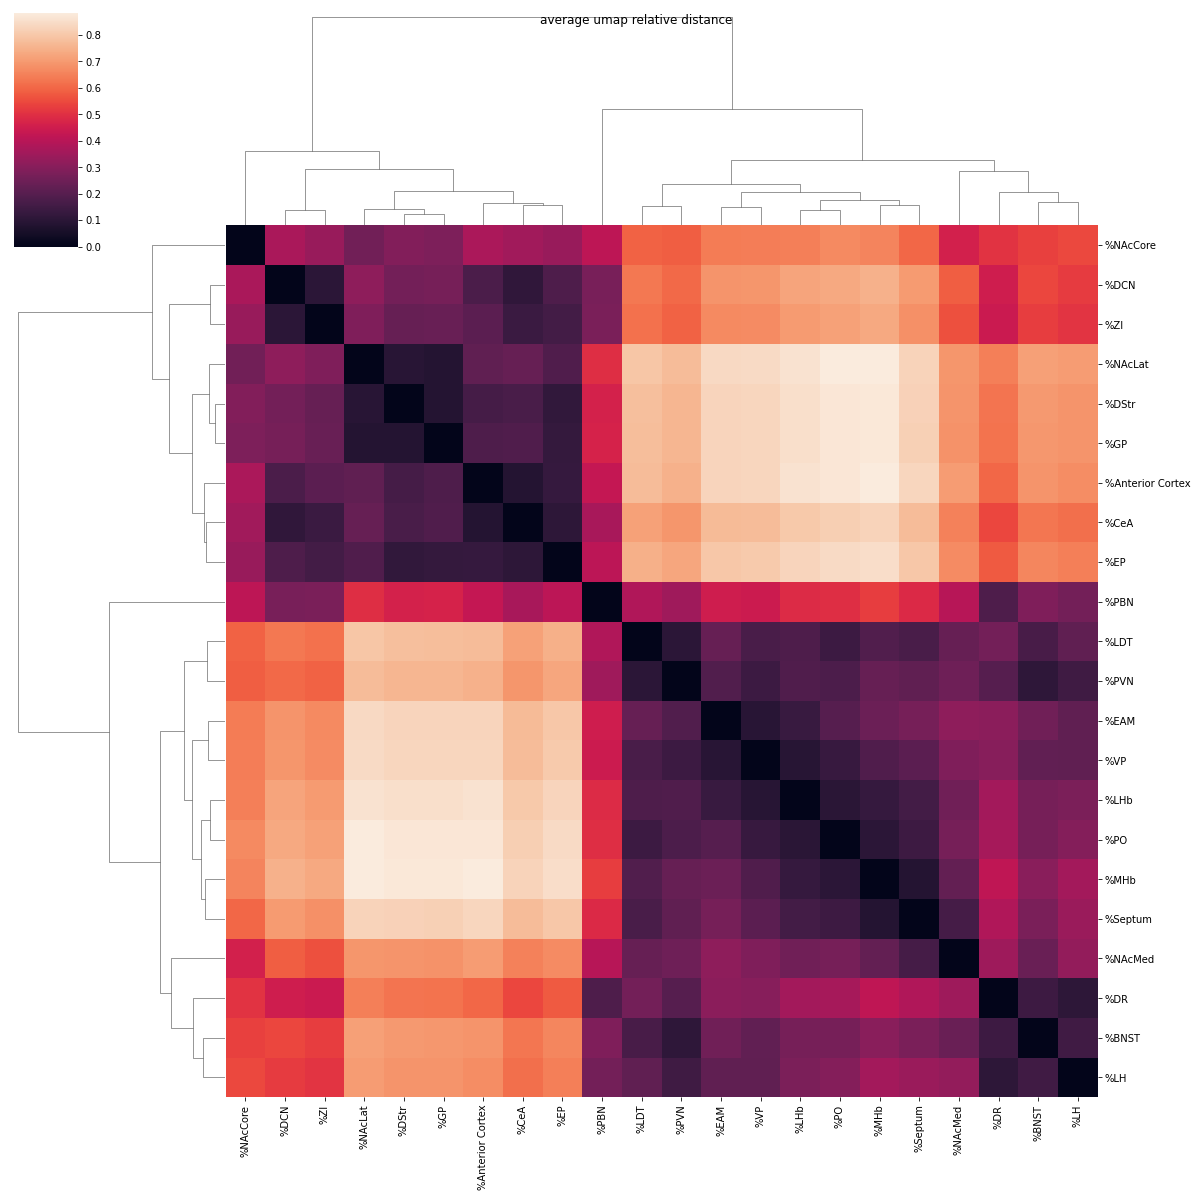

In [71]:
neighbors=int(len(labels)/3)
metrics=set_metric
reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1) 
embedding = reducer.fit_transform(X_scaled)
embedding.shape

align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
for i,r in enumerate(np.unique(align_embed.index.values)):
    drug1=align_embed[align_embed.index == r]
    ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
plt.savefig('figures/figumap_note6in71.svg')
plt.show()

#distance heatmap
to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
cm.fig.suptitle("average umap relative distance")
cm.fig.set_size_inches(18, 18)
plt.savefig('figures/figcorr_note6in71.svg')